In [1]:
import sys
import itertools

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from statsmodels.regression.linear_model import OLS

sys.path.append("..")
import helper.helper as h
import helper.methods as m

from importlib import reload  # Python 3.4+

In [2]:
# reload helper and methods for when things change
reload(m);
reload(h);

[[0.5 0.  0. ]
 [0.8 0.7 0. ]
 [0.3 0.4 0.6]]


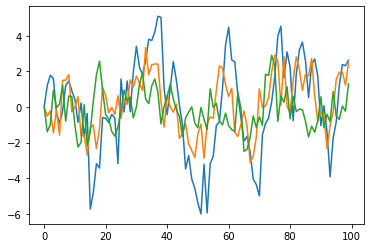

In [82]:
T = 100
W_true = np.array([[0.5, 0.0, 0.0], [0.8, 0.7, 0.0], [0.3, 0.4, 0.6]])
n = np.shape(W_true)[0]
X = h.generate_var_2(T, n, W_true, np.identity(n))
print(np.round(W_true, 2))
plt.plot(X);

### Mutual Coherence of $X$
Statement. If the mutual coherence of our data $X$ is small enough, we are guaranteed the true features back. That is, when $$\mu < \frac{1}{2k - 1},$$ we can recover the true matrix $W$ using OMP.

Per [This](https://angms.science/doc/RM/OMP.pdf).

In [91]:
mu = max([X[:, i] @ X[:, j] / (np.linalg.norm(X[:, i], 2) * np.linalg.norm(X[:, j], 2)) for i in range(n) for j in range(i)])
print("Mu:", round(mu, 3))
print("Maximum Sparsity of W:", np.floor(1 / 2 * mu))
print("True Sparsity of W:", len(W_true[W_true != 0]))

Mu: 0.595
Maximum Sparsity of W: 0.0
True Sparsity of W: 6


Unfortunately, our data matrix $X$ is *very* coherent, implying that this theorem will not help us in any way. Furthermore, in sparse signal modelling, we have that the number of columns is far greater than the number of rows. However, in our scenario, we have the exact opposite; we have many more samples (rows) than variables (columns).

In [95]:
X_norm = X.copy()
for column in X_norm:
    if np.linalg.norm(column, 2) == 0:
        column = 0
    else:
        column /= np.linalg.norm(column, 2)
        
print(X_norm @ X_norm.T)
print(X.T @ X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.92678436 ... 0.30154031 0.49563352 0.01110944]
 [0.         0.92678436 1.         ... 0.59609607 0.76172826 0.3657555 ]
 ...
 [0.         0.30154031 0.59609607 ... 1.         0.97329984 0.94496853]
 [0.         0.49563352 0.76172826 ... 0.97329984 1.         0.87262877]
 [0.         0.01110944 0.3657555  ... 0.94496853 0.87262877 1.        ]]
[[711.44296017 247.19365337  44.82163342]
 [247.19365337 242.99093551  42.86581156]
 [ 44.82163342  42.86581156 125.81570357]]
